<a href="https://colab.research.google.com/github/muditbac/nn-learn-notebooks/blob/main/minimoe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini MoE
In this colab, we will implement a basic version of MOE. MoE or Mixture of Experts is a layer to train multiple experts of which only few will be used during inference time. This way we can train large number of parameters among which only a subset will be used at a single inference. This allows us to train large number of parameters while keeping the inference light.
- MoE layer can also be thought of as differential `if` condition, which learns to route to different subnetworks based on the data.

We will train a MoE layer on sentiment classification task. The below code is built on top of [this](https://colab.research.google.com/github/bentrevett/pytorch-sentiment-analysis/blob/main/2%20-%20Recurrent%20Neural%20Ne)

[Diagram Link](https://viewer.diagrams.net/?tags=%7B%7D&highlight=0000ff&edit=_blank&layers=1&nav=1&title=Untitled%20Diagram.drawio#R7VrbbuM2EP0aPybg%2FfK4cZIuiixQ1MF2%2B6i1aFu1LBoyfduvL2VRlmg6azW27KYoAkTScEiRZ87MkCP3cH%2B2%2BSWP5pMvOlZpD4F408OPPYSEEPZ%2FIdiWAipAKRjnSVyKYC0YJD%2BUE1ZqyyRWC0%2FRaJ2aZO4LhzrL1NB4sijP9dpXG%2BnUf%2Bs8GqtAMBhGaSj9I4nNxC0L8Vr%2BWSXjSfVmyGTZMosqZbeSxSSK9bohwk893M%2B1NuXdbNNXaYFdhUvZ7%2FmN1v3EcpWZNh3oarqdLs2Prw%2FL9NfR9nkFvt7duVFWUbp0C34ZvH5xEzbbCoX1JDFqMI%2BGxfPaGrqHHxYm19M9KHY5D24slRu1eXOScL90SxmlZ8rkW6viOiDm0HJ0gZSVz%2BsafOpGnTRwx8SZ3Jl7vB%2B5RsTeOFD%2BAUAoAOh3vTQqvx1EhGMfIgwCiBi6IkQ4gOhpM7crXNwOIyroSRoxcUWMSIBRP40WC3VDjDggpzFiV8SIhrEoMsVi3gdRKenrVOdWkunMaj%2BMkjQ9EF0ASszgaSiv6ZIsgDIAcbjMV6oYA%2B6winLzqUiXNS4qiyvJ91QPp4Vok5hvRZd7AATlgmCIOaJEurY%2FbRu4J0JIDqgQCFMkCdyNZVf1bdcKgG1jhEIGkQTYAlO1v9k718ss3s0V7O2l4iBvH1jLrlYv86E6nf3s4sfKnGJmaP1cpZFJVv48jtly19WCGW0bCnOdZC5GNk29H%2F%2F91ufdWx8yLCAgAgsOJPfMD5iVCcog5YRzbDl%2BYH%2BvL%2BOcHhBAIkYaDCBdMoC2ZADqlgFu5N8KQSPTE%2BGHFcIP6FKOeFHyiO7JwyAnWFYRwI8dR4zvkYcyJKmkewWfO4BIJpiUHHEbhO1gXXIHteQOvgV36OFG%2BhrckTcNPBJIhBGDREgqYJmU2lNH2kMdJZBLKG1ew%2FjfEHVuwpwg6kjZZM5ppvn63TCtKg90STVJMRXE8QW33uLc7bhmiWg32LT6u90eB7fkGvlYexwUnjoDAhT4Ddyjzs1Ej3UWpU%2B19AD1WudF67kjzl%2FKmK2rS0VLo61oYmapa71kOgFt9yLnbkbOK4iEnveqNuEhzRRCD6soTcaZvR9aaJQ9gD0UZ65kGKWfXMMsieOdWY4d8I45yHmlJujHLXSkjOJE3pkNdAVseP69BaPrlOnHrH0Ie9w0Gx%2B3HWys2u6skLhE0AozoPArbJj6I5Tzcp06CG1hzfFVT1VmLdau7Niwpl8EidUoWqbmaLmkvXeOdGaeo1mSFvB8VulKFXquwfEKIvccvrpZgqmlF3BoDH2zHXFofqx03JVD49COHz1FiZaOid%2Bw1JVSVHiG3TmQ3YiwHdniZGVvx8WtsZPoF0tC7ordNauU7RQa%2Bh8vz9kzzUm34Nd0C%2FLBvQC3LRvic89v5%2BEcftt7mn1XcZxkYyt%2Bibb%2Fp5Of%2BQ2t4vfbfgPRNfMJuYnjNEoo%2Fin2evtB3PYMe27WeVe9hOOD72jg4Dv8gT4S7Gf63dRL8JGPtFUwOJYWlUuLCvnX%2B%2Fv74uk%2FkxyZkKecXF7Gx%2B1j%2FVuP0qz1D2bw098%3D)

# Training

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.8 MB/s eta 0:00:00


In [ ]:
import collections

import datasets
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchtext
import tqdm

In [ ]:
seed = 1234

np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

In [ ]:
td, ttd = train_data, test_data = datasets.load_dataset("imdb", split=["train", "test"])

In [ ]:
tokenizer = torchtext.data.utils.get_tokenizer("basic_english")

In [ ]:
def tokenize_example(example, tokenizer, max_length):
    tokens = tokenizer(example["text"])[:max_length]
    length = len(tokens)
    return {"tokens": tokens, "length": length}

In [ ]:
max_length = 256

train_data = train_data.map(
    tokenize_example, fn_kwargs={"tokenizer": tokenizer, "max_length": max_length}
)
test_data = test_data.map(
    tokenize_example, fn_kwargs={"tokenizer": tokenizer, "max_length": max_length}
)

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

In [ ]:
test_size = 0.25

train_valid_data = train_data.train_test_split(test_size=test_size)
train_data = train_valid_data["train"]
valid_data = train_valid_data["test"]

In [ ]:
min_freq = 5
special_tokens = ["<unk>", "<pad>"]

vocab = torchtext.vocab.build_vocab_from_iterator(
    train_data["tokens"],
    min_freq=min_freq,
    specials=special_tokens,
)

In [ ]:
unk_index = vocab["<unk>"]
pad_index = vocab["<pad>"]

In [ ]:
vocab.set_default_index(unk_index)

In [ ]:
def numericalize_example(example, vocab):
    ids = vocab.lookup_indices(example["tokens"])
    return {"ids": ids}

In [ ]:
train_data = train_data.map(numericalize_example, fn_kwargs={"vocab": vocab})
valid_data = valid_data.map(numericalize_example, fn_kwargs={"vocab": vocab})
test_data = test_data.map(numericalize_example, fn_kwargs={"vocab": vocab})

Map:   0%|          | 0/18750 [00:00<?, ? examples/s]

Map:   0%|          | 0/6250 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

In [ ]:
train_data = train_data.with_format(type="torch", columns=["ids", "label", "length"])
valid_data = valid_data.with_format(type="torch", columns=["ids", "label", "length"])
test_data = test_data.with_format(type="torch", columns=["ids", "label", "length"])

In [ ]:
train_data[0]

{'label': tensor(1),
 'length': tensor(135),
 'ids': tensor([  180,     4,    14,    10,   191,   841,    34,     7,     2,   121,
            98,   816,    50,     8,  1516,     2,   380,     7,     2,   184,
             3,     8,   805,    14,    18,    10,     8,   805,  2246,   429,
             3,    12,   347,    15,     2,   388,  1025,     9,    16,    76,
             5,    64,     7, 11198,     3,     2,  9212,    17,   761,     4,
          7812,  5460,   198,    37,     4,     6,  3653,  3683,    17,   226,
             5, 11893,     3,    53,     7,    15,  3310,   354,     5,   689,
             4,     0,  5471,     3,  2706,  3826,     9,    16,   246,    13,
            14,    18,  1111,    33,    17,   126,   188,     8,    35,   597,
           181,    19,     5,    34,  3942,  1381,    13,     2,  5370,     3,
            32,  4228,    10,    41,  2825,     8,    37,     3,     2,  4411,
          1141,   213,  2655,     6, 16946,  3729,   590,  4845,     8,  2416,


In [ ]:
def get_collate_fn(pad_index):
    def collate_fn(batch):
        batch_ids = [i["ids"] for i in batch]
        batch_ids = nn.utils.rnn.pad_sequence(
            batch_ids, padding_value=pad_index, batch_first=True
        )
        batch_length = [i["length"] for i in batch]
        batch_length = torch.stack(batch_length)
        batch_label = [i["label"] for i in batch]
        batch_label = torch.stack(batch_label)
        batch = {"ids": batch_ids, "length": batch_length, "label": batch_label}
        return batch

    return collate_fn

In [ ]:
def get_data_loader(dataset, batch_size, pad_index, shuffle=False):
    collate_fn = get_collate_fn(pad_index)
    data_loader = torch.utils.data.DataLoader(
        dataset=dataset,
        batch_size=batch_size,
        collate_fn=collate_fn,
        shuffle=shuffle,
    )
    return data_loader

In [ ]:
batch_size = 512

train_data_loader = get_data_loader(train_data, batch_size, pad_index, shuffle=True)
valid_data_loader = get_data_loader(valid_data, batch_size, pad_index)
test_data_loader = get_data_loader(test_data, batch_size, pad_index)

In [ ]:
class GatingLayer(nn.Module):


  def __init__(self, ngates, hidden=256, k=2):
    super().__init__()

    self.linear_layer_router = nn.Linear(hidden, ngates, bias=False)
    self.linear_layer_noise = nn.Linear(hidden, ngates, bias=False)
    self.hidden = hidden
    self.k = k

  def forward(self, state):
    # state -> (batch size, hidden )
    bs = state.shape[0]
    h = self.linear_layer_router(state)
    l = self.linear_layer_noise(state)
    ret = h + F.softplus(l)*torch.randn_like(l)

    # ret -> batch size x ngates
    vals, idx = ret.topk(self.k, dim=1)
    topk = torch.zeros_like(ret)
    topk.fill_(float('-inf'))
    topk.scatter_(-1, idx, vals)
    return F.softmax(topk, dim=1)



g = GatingLayer(4, 100, k=2)
q = torch.randn(16, 100)
g(q)

tensor([[0.4097, 0.0000, 0.5903, 0.0000],
        [0.7055, 0.0000, 0.0000, 0.2945],
        [0.5808, 0.4192, 0.0000, 0.0000],
        [0.0000, 0.5688, 0.4312, 0.0000],
        [0.0000, 0.5139, 0.4861, 0.0000],
        [0.0000, 0.2638, 0.0000, 0.7362],
        [0.0000, 0.2538, 0.7462, 0.0000],
        [0.6833, 0.0000, 0.0000, 0.3167],
        [0.5427, 0.0000, 0.0000, 0.4573],
        [0.3340, 0.0000, 0.0000, 0.6660],
        [0.0000, 0.4470, 0.5530, 0.0000],
        [0.4729, 0.0000, 0.0000, 0.5271],
        [0.4317, 0.0000, 0.5683, 0.0000],
        [0.3335, 0.0000, 0.6665, 0.0000],
        [0.0000, 0.0000, 0.3802, 0.6198],
        [0.7243, 0.0000, 0.2757, 0.0000]], grad_fn=<SoftmaxBackward0>)

In [ ]:
class LSTM(nn.Module):
    def __init__(
        self,
        vocab_size,
        embedding_dim,
        hidden_dim,
        output_dim,
        n_layers,
        bidirectional,
        dropout_rate,
        pad_index, k=2
    ):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=pad_index)
        self.lstm = nn.LSTM(
            embedding_dim,
            hidden_dim,
            n_layers,
            bidirectional=bidirectional,
            dropout=dropout_rate if n_layers > 1 else 0,
            batch_first=True,
        )
        hs = hidden_dim * 2 if bidirectional else hidden_dim
        self.dropout = nn.Dropout(dropout_rate)


        nexperts = 4
        self.expert_networks = nn.ModuleList([nn.Linear(hs, output_dim) for i in range(nexperts)])

        self.gating_layer = GatingLayer(nexperts, hs, k=k)

    def forward(self, ids, length):
        # ids = [batch size, seq len]
        # length = [batch size]
        embedded = self.dropout(self.embedding(ids))
        # embedded = [batch size, seq len, embedding dim]
        packed_embedded = nn.utils.rnn.pack_padded_sequence(
            embedded, length, batch_first=True, enforce_sorted=False
        )
        packed_output, (hidden, cell) = self.lstm(packed_embedded)
        # hidden = [n layers * n directions, batch size, hidden dim]
        # cell = [n layers * n directions, batch size, hidden dim]
        output, output_length = nn.utils.rnn.pad_packed_sequence(packed_output)
        # output = [batch size, seq len, hidden dim * n directions]
        if self.lstm.bidirectional:
            hidden = self.dropout(torch.cat([hidden[-1], hidden[-2]], dim=-1))
            # hidden = [batch size, hidden dim * 2]
        else:
            hidden = self.dropout(hidden[-1])
            # hidden = [batch size, hidden dim]

        gated = self.gating_layer(hidden) # [bs x ngates]
        experts = [f(hidden) for f in self.expert_networks]
        experts = torch.stack(experts, dim=0) # [ngates x bs x classes]

        prediction = torch.einsum("bg,gbc->bc", gated, experts)

        # prediction = self.fc(hidden)
        # prediction = [batch size, output dim]
        return prediction

In [ ]:
vocab_size = len(vocab)
embedding_dim = 300
hidden_dim = 100
output_dim = len(train_data.unique("label"))
n_layers = 1
bidirectional = False
dropout_rate = 0.5

model = LSTM(
    vocab_size,
    embedding_dim,
    hidden_dim,
    output_dim,
    n_layers,
    bidirectional,
    dropout_rate,
    pad_index,
)

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


print(f"The model has {count_parameters(model):,} trainable parameters")

The model has 6,652,908 trainable parameters


In [ ]:
model

LSTM(
  (embedding): Embedding(21635, 300, padding_idx=1)
  (lstm): LSTM(300, 100, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (expert_networks): ModuleList(
    (0-3): 4 x Linear(in_features=100, out_features=2, bias=True)
  )
  (gating_layer): GatingLayer(
    (linear_layer_router): Linear(in_features=100, out_features=4, bias=False)
    (linear_layer_noise): Linear(in_features=100, out_features=4, bias=False)
  )
)

In [ ]:
def initialize_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_normal_(m.weight)
        if m.bias is not None:
          nn.init.zeros_(m.bias)
    elif isinstance(m, nn.LSTM):
        for name, param in m.named_parameters():
            if "bias" in name:
                nn.init.zeros_(param)
            elif "weight" in name:
                nn.init.orthogonal_(param)

In [ ]:
model.apply(initialize_weights)

LSTM(
  (embedding): Embedding(21635, 300, padding_idx=1)
  (lstm): LSTM(300, 100, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (expert_networks): ModuleList(
    (0-3): 4 x Linear(in_features=100, out_features=2, bias=True)
  )
  (gating_layer): GatingLayer(
    (linear_layer_router): Linear(in_features=100, out_features=4, bias=False)
    (linear_layer_noise): Linear(in_features=100, out_features=4, bias=False)
  )
)

In [ ]:
vectors = torchtext.vocab.GloVe()
pretrained_embedding = vectors.get_vecs_by_tokens(vocab.get_itos())
model.embedding.weight.data = pretrained_embedding

.vector_cache/glove.840B.300d.zip: 2.18GB [06:51, 5.29MB/s]                            
100%|█████████▉| 2196016/2196017 [04:57<00:00, 7371.04it/s]


In [ ]:
lr = 5e-4

optimizer = optim.Adam(model.parameters(), lr=lr)

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
torch.cuda.is_available()

True

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

device

device(type='cuda')

In [ ]:
model = model.to(device)
criterion = criterion.to(device)

In [ ]:
def train(dataloader, model, criterion, optimizer, device):
    model.train()
    epoch_losses = []
    epoch_accs = []
    for batch in tqdm.tqdm(dataloader, desc="training..."):
        ids = batch["ids"].to(device)
        length = batch["length"]
        label = batch["label"].to(device)
        prediction = model(ids, length)
        loss = criterion(prediction, label)
        accuracy = get_accuracy(prediction, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_losses.append(loss.item())
        epoch_accs.append(accuracy.item())
    return np.mean(epoch_losses), np.mean(epoch_accs)

In [ ]:
def evaluate(dataloader, model, criterion, device):
    model.eval()
    epoch_losses = []
    epoch_accs = []
    with torch.no_grad():
        for batch in tqdm.tqdm(dataloader, desc="evaluating..."):
            ids = batch["ids"].to(device)
            length = batch["length"]
            label = batch["label"].to(device)
            prediction = model(ids, length)
            loss = criterion(prediction, label)
            accuracy = get_accuracy(prediction, label)
            epoch_losses.append(loss.item())
            epoch_accs.append(accuracy.item())
    return np.mean(epoch_losses), np.mean(epoch_accs)

In [ ]:
def get_accuracy(prediction, label):
    batch_size, _ = prediction.shape
    predicted_classes = prediction.argmax(dim=-1)
    correct_predictions = predicted_classes.eq(label).sum()
    accuracy = correct_predictions / batch_size
    return accuracy

In [ ]:
n_epochs = 50
best_valid_loss = float("inf")

metrics = collections.defaultdict(list)

for epoch in range(n_epochs):
    train_loss, train_acc = train(
        train_data_loader, model, criterion, optimizer, device
    )
    valid_loss, valid_acc = evaluate(valid_data_loader, model, criterion, device)
    metrics["train_losses"].append(train_loss)
    metrics["train_accs"].append(train_acc)
    metrics["valid_losses"].append(valid_loss)
    metrics["valid_accs"].append(valid_acc)
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), "lstm.pt")
    print(f"epoch: {epoch}")
    print(f"train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}")
    print(f"valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}")

evaluating...: 100%|██████████| 13/13 [00:00<00:00, 16.26it/s]


epoch: 0
train_loss: 0.692, train_acc: 0.528
valid_loss: 0.679, valid_acc: 0.584


evaluating...: 100%|██████████| 13/13 [00:00<00:00, 25.17it/s]


epoch: 1
train_loss: 0.664, train_acc: 0.595
valid_loss: 0.550, valid_acc: 0.717


evaluating...: 100%|██████████| 13/13 [00:00<00:00, 23.97it/s]


epoch: 2
train_loss: 0.568, train_acc: 0.728
valid_loss: 0.494, valid_acc: 0.780


evaluating...: 100%|██████████| 13/13 [00:00<00:00, 17.46it/s]


epoch: 3
train_loss: 0.523, train_acc: 0.759
valid_loss: 0.500, valid_acc: 0.787


evaluating...: 100%|██████████| 13/13 [00:00<00:00, 23.94it/s]


epoch: 4
train_loss: 0.496, train_acc: 0.781
valid_loss: 0.473, valid_acc: 0.783


evaluating...: 100%|██████████| 13/13 [00:00<00:00, 24.33it/s]


epoch: 5
train_loss: 0.456, train_acc: 0.801
valid_loss: 0.468, valid_acc: 0.806


evaluating...: 100%|██████████| 13/13 [00:00<00:00, 18.85it/s]


epoch: 6
train_loss: 0.435, train_acc: 0.814
valid_loss: 0.469, valid_acc: 0.811


evaluating...: 100%|██████████| 13/13 [00:00<00:00, 24.12it/s]


epoch: 7
train_loss: 0.416, train_acc: 0.826
valid_loss: 0.438, valid_acc: 0.825


evaluating...: 100%|██████████| 13/13 [00:00<00:00, 24.13it/s]


epoch: 8
train_loss: 0.385, train_acc: 0.844
valid_loss: 0.472, valid_acc: 0.827


evaluating...: 100%|██████████| 13/13 [00:00<00:00, 24.03it/s]


epoch: 9
train_loss: 0.351, train_acc: 0.862
valid_loss: 0.541, valid_acc: 0.815


evaluating...: 100%|██████████| 13/13 [00:00<00:00, 24.08it/s]


epoch: 10
train_loss: 0.333, train_acc: 0.867
valid_loss: 0.635, valid_acc: 0.809


evaluating...: 100%|██████████| 13/13 [00:00<00:00, 25.13it/s]


epoch: 11
train_loss: 0.295, train_acc: 0.886
valid_loss: 0.653, valid_acc: 0.816


evaluating...: 100%|██████████| 13/13 [00:00<00:00, 24.06it/s]


epoch: 12
train_loss: 0.282, train_acc: 0.890
valid_loss: 0.595, valid_acc: 0.831


evaluating...: 100%|██████████| 13/13 [00:00<00:00, 24.70it/s]


epoch: 13
train_loss: 0.265, train_acc: 0.901
valid_loss: 0.656, valid_acc: 0.819


evaluating...: 100%|██████████| 13/13 [00:00<00:00, 24.76it/s]


epoch: 14
train_loss: 0.244, train_acc: 0.909
valid_loss: 0.606, valid_acc: 0.835


evaluating...: 100%|██████████| 13/13 [00:00<00:00, 24.24it/s]


epoch: 15
train_loss: 0.234, train_acc: 0.914
valid_loss: 0.728, valid_acc: 0.818


evaluating...: 100%|██████████| 13/13 [00:00<00:00, 19.19it/s]


epoch: 16
train_loss: 0.225, train_acc: 0.916
valid_loss: 0.526, valid_acc: 0.855


evaluating...: 100%|██████████| 13/13 [00:00<00:00, 24.66it/s]


epoch: 17
train_loss: 0.215, train_acc: 0.920
valid_loss: 0.648, valid_acc: 0.837


evaluating...: 100%|██████████| 13/13 [00:00<00:00, 24.62it/s]


epoch: 18
train_loss: 0.188, train_acc: 0.931
valid_loss: 0.730, valid_acc: 0.830


evaluating...: 100%|██████████| 13/13 [00:01<00:00, 12.67it/s]


epoch: 19
train_loss: 0.183, train_acc: 0.934
valid_loss: 0.703, valid_acc: 0.836


evaluating...: 100%|██████████| 13/13 [00:00<00:00, 23.76it/s]


epoch: 20
train_loss: 0.166, train_acc: 0.943
valid_loss: 0.702, valid_acc: 0.839


evaluating...: 100%|██████████| 13/13 [00:00<00:00, 24.54it/s]


epoch: 21
train_loss: 0.155, train_acc: 0.945
valid_loss: 0.723, valid_acc: 0.837


evaluating...: 100%|██████████| 13/13 [00:00<00:00, 17.06it/s]


epoch: 22
train_loss: 0.147, train_acc: 0.949
valid_loss: 0.805, valid_acc: 0.829


evaluating...: 100%|██████████| 13/13 [00:00<00:00, 24.47it/s]


epoch: 23
train_loss: 0.147, train_acc: 0.949
valid_loss: 0.719, valid_acc: 0.846


evaluating...: 100%|██████████| 13/13 [00:00<00:00, 24.21it/s]


epoch: 24
train_loss: 0.130, train_acc: 0.957
valid_loss: 0.715, valid_acc: 0.845


evaluating...: 100%|██████████| 13/13 [00:00<00:00, 20.27it/s]


epoch: 25
train_loss: 0.122, train_acc: 0.959
valid_loss: 0.597, valid_acc: 0.862


evaluating...: 100%|██████████| 13/13 [00:00<00:00, 24.18it/s]


epoch: 26
train_loss: 0.116, train_acc: 0.961
valid_loss: 0.895, valid_acc: 0.838


evaluating...: 100%|██████████| 13/13 [00:00<00:00, 24.04it/s]


epoch: 27
train_loss: 0.111, train_acc: 0.962
valid_loss: 0.730, valid_acc: 0.855


evaluating...: 100%|██████████| 13/13 [00:00<00:00, 23.62it/s]


epoch: 28
train_loss: 0.109, train_acc: 0.961
valid_loss: 0.787, valid_acc: 0.849


evaluating...: 100%|██████████| 13/13 [00:00<00:00, 24.53it/s]


epoch: 29
train_loss: 0.103, train_acc: 0.964
valid_loss: 0.838, valid_acc: 0.846


evaluating...: 100%|██████████| 13/13 [00:00<00:00, 23.99it/s]


epoch: 30
train_loss: 0.093, train_acc: 0.969
valid_loss: 0.834, valid_acc: 0.845


evaluating...: 100%|██████████| 13/13 [00:00<00:00, 23.92it/s]


epoch: 31
train_loss: 0.092, train_acc: 0.968
valid_loss: 0.876, valid_acc: 0.842


evaluating...: 100%|██████████| 13/13 [00:00<00:00, 23.87it/s]


epoch: 32
train_loss: 0.086, train_acc: 0.973
valid_loss: 0.877, valid_acc: 0.845


evaluating...: 100%|██████████| 13/13 [00:00<00:00, 24.09it/s]


epoch: 33
train_loss: 0.082, train_acc: 0.974
valid_loss: 0.610, valid_acc: 0.872


evaluating...: 100%|██████████| 13/13 [00:00<00:00, 24.45it/s]


epoch: 34
train_loss: 0.076, train_acc: 0.976
valid_loss: 0.952, valid_acc: 0.841


evaluating...: 100%|██████████| 13/13 [00:00<00:00, 24.79it/s]


epoch: 35
train_loss: 0.074, train_acc: 0.976
valid_loss: 0.819, valid_acc: 0.855


evaluating...: 100%|██████████| 13/13 [00:00<00:00, 23.81it/s]


epoch: 36
train_loss: 0.065, train_acc: 0.978
valid_loss: 0.793, valid_acc: 0.861


evaluating...: 100%|██████████| 13/13 [00:00<00:00, 23.85it/s]


epoch: 37
train_loss: 0.073, train_acc: 0.975
valid_loss: 0.849, valid_acc: 0.852


evaluating...: 100%|██████████| 13/13 [00:00<00:00, 22.98it/s]


epoch: 38
train_loss: 0.059, train_acc: 0.981
valid_loss: 0.986, valid_acc: 0.844


evaluating...: 100%|██████████| 13/13 [00:00<00:00, 24.45it/s]


epoch: 39
train_loss: 0.061, train_acc: 0.980
valid_loss: 0.901, valid_acc: 0.850


evaluating...: 100%|██████████| 13/13 [00:00<00:00, 24.45it/s]


epoch: 40
train_loss: 0.062, train_acc: 0.981
valid_loss: 0.914, valid_acc: 0.852


evaluating...: 100%|██████████| 13/13 [00:00<00:00, 20.36it/s]


epoch: 41
train_loss: 0.056, train_acc: 0.983
valid_loss: 0.850, valid_acc: 0.856


evaluating...: 100%|██████████| 13/13 [00:00<00:00, 23.41it/s]


epoch: 42
train_loss: 0.046, train_acc: 0.985
valid_loss: 0.981, valid_acc: 0.853


evaluating...: 100%|██████████| 13/13 [00:00<00:00, 24.34it/s]


epoch: 43
train_loss: 0.050, train_acc: 0.983
valid_loss: 0.908, valid_acc: 0.856


evaluating...: 100%|██████████| 13/13 [00:00<00:00, 16.33it/s]


epoch: 44
train_loss: 0.047, train_acc: 0.985
valid_loss: 0.875, valid_acc: 0.862


evaluating...: 100%|██████████| 13/13 [00:00<00:00, 24.05it/s]


epoch: 45
train_loss: 0.042, train_acc: 0.987
valid_loss: 0.791, valid_acc: 0.863


evaluating...: 100%|██████████| 13/13 [00:00<00:00, 23.69it/s]


epoch: 46
train_loss: 0.046, train_acc: 0.986
valid_loss: 0.875, valid_acc: 0.864


evaluating...: 100%|██████████| 13/13 [00:00<00:00, 16.94it/s]


epoch: 47
train_loss: 0.039, train_acc: 0.986
valid_loss: 0.848, valid_acc: 0.862


evaluating...: 100%|██████████| 13/13 [00:00<00:00, 23.65it/s]


epoch: 48
train_loss: 0.037, train_acc: 0.989
valid_loss: 0.795, valid_acc: 0.867


evaluating...: 100%|██████████| 13/13 [00:00<00:00, 23.85it/s]

epoch: 49
train_loss: 0.038, train_acc: 0.988
valid_loss: 0.876, valid_acc: 0.863


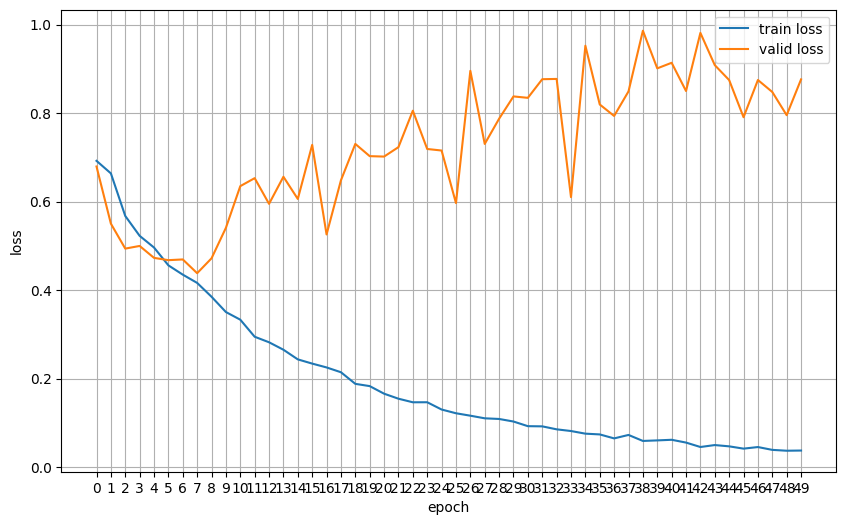

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(metrics["train_losses"], label="train loss")
ax.plot(metrics["valid_losses"], label="valid loss")
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_xticks(range(n_epochs))
ax.legend()
ax.grid()

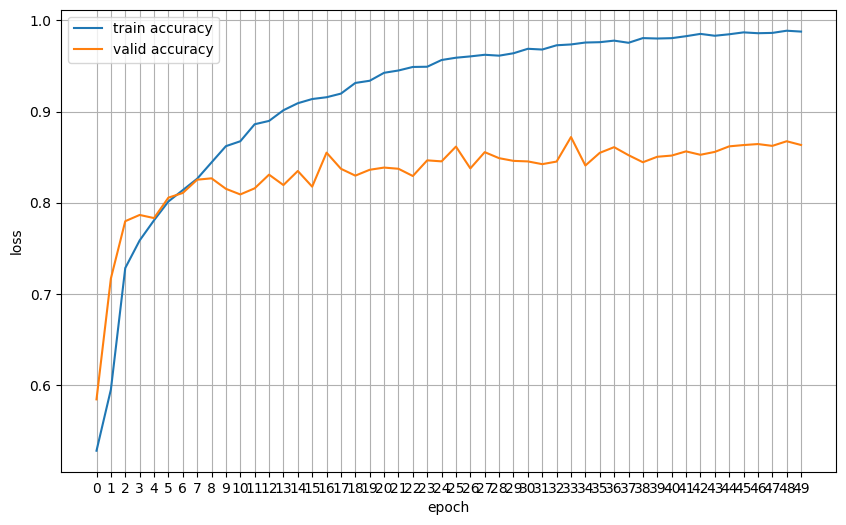

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(metrics["train_accs"], label="train accuracy")
ax.plot(metrics["valid_accs"], label="valid accuracy")
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_xticks(range(n_epochs))
ax.legend()
ax.grid()

In [ ]:
model = LSTM(
    vocab_size,
    embedding_dim,
    hidden_dim,
    output_dim,
    n_layers,
    bidirectional,
    dropout_rate,
    pad_index, k=2
)
model.to(device)
model.load_state_dict(torch.load("lstm.pt"))


test_loss, test_acc = evaluate(test_data_loader, model, criterion, device)

evaluating...: 100%|██████████| 49/49 [00:03<00:00, 15.68it/s]


In [ ]:
print(f"test_loss: {test_loss:.3f}, test_acc: {test_acc:.3f}")

test_loss: 0.461, test_acc: 0.810


In [ ]:
ret = []
def capture_weights(model, input, output):
  print(output)

model = LSTM(
    vocab_size,
    embedding_dim,
    hidden_dim,
    output_dim,
    n_layers,
    bidirectional,
    dropout_rate,
    pad_index, k=2
)
model.load_state_dict(torch.load("lstm.pt"))
model.to(device)

# model.gating_layer.register_forward_hook(capture_weights)
# hook = model.register_forward_hook(capture_weights)
test_loss, test_acc = evaluate(test_data_loader, model, criterion, device)
# hook.remove()

evaluating...: 100%|██████████| 49/49 [00:02<00:00, 20.04it/s]


In [ ]:
print(f"test_loss: {test_loss:.3f}, test_acc: {test_acc:.3f}")

test_loss: 0.462, test_acc: 0.810


In [ ]:
def predict_sentiment(text, model, tokenizer, vocab, device):
    tokens = tokenizer(text)
    ids = vocab.lookup_indices(tokens)
    length = torch.LongTensor([len(ids)])
    tensor = torch.LongTensor(ids).unsqueeze(dim=0).to(device)
    prediction = model(tensor, length).squeeze(dim=0)
    probability = torch.softmax(prediction, dim=-1)
    predicted_class = prediction.argmax(dim=-1).item()
    predicted_probability = probability[predicted_class].item()
    return predicted_class, predicted_probability

def predict_sentiment_with_expert(text, model, tokenizer, vocab, device):
    expert_vec = None
    def set_expert_vec(model, input, output):
      nonlocal expert_vec
      expert_vec = output

    tokens = tokenizer(text)
    ids = vocab.lookup_indices(tokens)
    length = torch.LongTensor([len(ids)])
    tensor = torch.LongTensor(ids).unsqueeze(dim=0).to(device)

    hook = model.gating_layer.register_forward_hook(set_expert_vec)
    prediction = model(tensor, length).squeeze(dim=0)
    hook.remove()
    probability = torch.softmax(prediction, dim=-1)
    predicted_class = prediction.argmax(dim=-1).item()
    predicted_probability = probability[predicted_class].item()
    return predicted_class, predicted_probability, expert_vec

In [ ]:
text = "This film is terrible!"

predict_sentiment_with_expert(text, model, tokenizer, vocab, device)

(0,
 0.7510334849357605,
 tensor([[0.0000, 0.0000, 0.4248, 0.5752]], device='cuda:0',
        grad_fn=<SoftmaxBackward0>))

In [ ]:
text = "This film is great!"

predict_sentiment(text, model, tokenizer, vocab, device)

(1, 0.8347806334495544)

In [ ]:
text = "This film is not terrible, it's great!"

predict_sentiment(text, model, tokenizer, vocab, device)

tensor([[ 0.0649, -0.2059]], device='cuda:0', grad_fn=<ViewBackward0>)


(0, 0.5672767758369446)

In [ ]:
text = "This film is not great, it's terrible!"

predict_sentiment(text, model, tokenizer, vocab, device)

tensor([[-0.2116,  0.1060]], device='cuda:0', grad_fn=<ViewBackward0>)


(1, 0.5787439942359924)

# Visualize
- total number of records going into each experts
- what kind of questions are going into what experts
- also validate if weights for each expert are different or not? a. MAE b. distribution

## Expert Distribution

In [ ]:
model

LSTM(
  (embedding): Embedding(21635, 300, padding_idx=1)
  (lstm): LSTM(300, 100, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (expert_networks): ModuleList(
    (0-3): 4 x Linear(in_features=100, out_features=2, bias=True)
  )
  (gating_layer): GatingLayer(
    (linear_layer_router): Linear(in_features=100, out_features=4, bias=False)
    (linear_layer_noise): Linear(in_features=100, out_features=4, bias=False)
  )
)

In [ ]:
(model.expert_networks[3].weight).abs().mean()

tensor(0.1113, device='cuda:0', grad_fn=<MeanBackward0>)

In [ ]:
(model.expert_networks[1].weight).abs().mean()

tensor(0.1132, device='cuda:0', grad_fn=<MeanBackward0>)

In [ ]:
(model.expert_networks[3].weight - model.expert_networks[1].weight).abs().mean()

tensor(0.1545, device='cuda:0', grad_fn=<MeanBackward0>)


- Weights are not converging to a single point.

## What happens to tunable noise?

In [ ]:
model.gating_layer.linear_layer_noise.weight.abs().mean()

tensor(0.1018, device='cuda:0', grad_fn=<MeanBackward0>)

In [ ]:
model.gating_layer.linear_layer_router.weight.abs().mean()

tensor(0.1154, device='cuda:0', grad_fn=<MeanBackward0>)

In [ ]:
records = []
for rec in tqdm.tqdm(ttd):
  cls, prob, expert = predict_sentiment_with_expert(rec['text'], model, tokenizer, vocab, device)
  records.append({
      "text": rec['text'],
      "label": rec['label'],
      "prob": prob,
      "cls": cls,
      "expert": expert.detach().cpu().numpy()[0],
  })


100%|██████████| 25000/25000 [02:18<00:00, 181.15it/s]


In [ ]:
import pandas as pd
df_test = pd.DataFrame(records)

In [ ]:
# @markdown all experts are given almost similar samples

np.sum([x['expert'] for x in records], axis=0)

array([6154.4507, 7389.9517, 5245.819 , 6209.772 ], dtype=float32)

In [ ]:
for i in range(4):
  s = sorted(records, key = lambda x: -x['expert'][i])
  for p in s[:10]:
    print(p['expert'], p['text'])

  print("----")

[0.92405546 0.         0.         0.07594452] For avid Sci-Fi fans this movie is just what you've been waiting for. Watching this movie gets you lost into the characters, especially Riddick, the movies bad guy. This is the case where you root for the bad guy and want to see him live and win. As you watch the survivors struggle to stay alive you long to see who lives and how they survive these unknown creatures that have taken over this planet. An excellent movie, Vin Diesel did a wonderful job as convict Riddick and the acting and suspense were ravishing.A+
[0.9219297  0.         0.         0.07807028] several years ago i saw this film, without subtitles, on television, and despite me not understanding a word of what the characters were saying i still got the general idea, and the mood of the film fascinated me no ends.<br /><br />at long last i saw it again a few weeks ago. my heart skipped when i saw the picture in the television guide, and for 8 days until the film was really shown 

In [ ]:
df_test.to_csv('test.csv')

# Learning
- No specific pattern is currently visible in the experts. This could be because
  - maybe we have trained for less number of epoch. but the model has already to overfit as evident from train and val curve
  - the task is simply for the network: The sentiment classification in this dataset if too easy for this network to learn. Since the task is simply the LSTM itself is able to learn easily and thus no need for experts. Thus any expert can be used to generate for any sample. Validate this hypothesis.
  - Missing Loss Components: generally MoE layers are trained with auxilary losses which focuses on sparsity and load balancing. We have not added any such loss which could lead to inappopriate training of model  
- MoE works well for complex task with large amount of data i.e. like LLM pretraining and finetuning